# Data Analysis for Orange Disease Classification

This notebook demonstrates data preprocessing steps for the Orange Disease Classification dataset.

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from PIL import Image

We know from the task description that we have 4 different classes (fresh, citrus canker, black spot and and greening citrus). The labels are represented in the dataset via folders. In the training set for example, there is a folder called 'canker' for each example belonging to that label. 
Let's first get an overview of the dataset

In [45]:
# Set the path to the dataset directory
dataset_dir = '../data/train'

# Define the categories
categories = ['blackspot', 'canker', 'fresh', 'grenning']

# Count number of files in each training folder
print("Number of files for each category:")
for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    print(f"{category}: {len(os.listdir(category_dir))}")
    

Number of files for each category:
blackspot: 184
canker: 179
fresh: 281
grenning: 347


We can see that the amount of sampling data is evenly distributed. However, the total number of examples is not very large. I can think of the following methods to deal with the small amount of data.

1. Consider model architectures that do not need as many sampling data
2. Augment the data (e.g rotation, random noise, flipping)

# Visualize some examples of training data

Look at one example for each category.

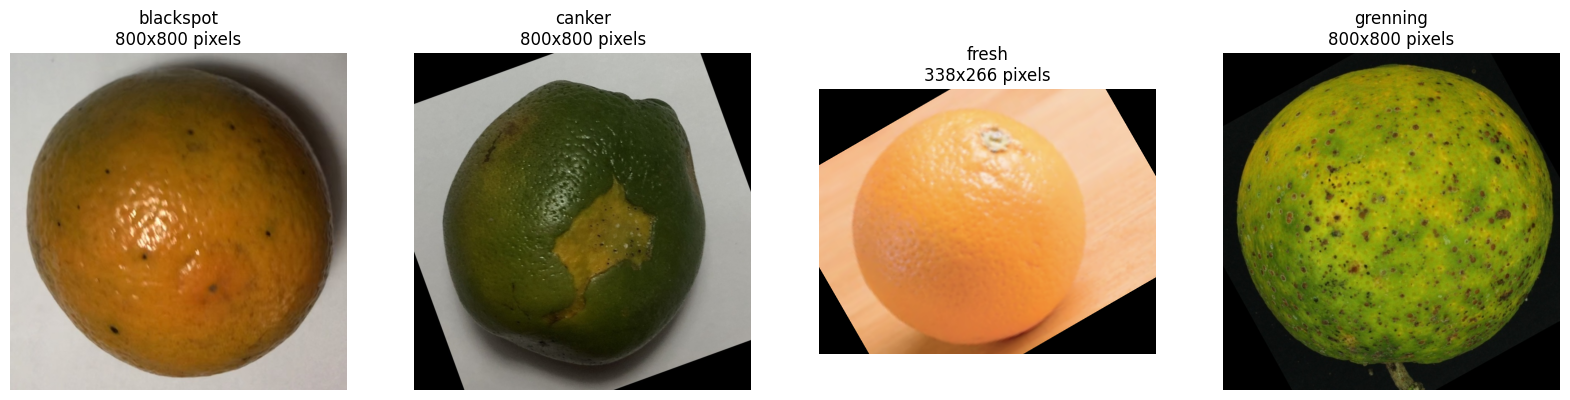

In [46]:
# Create a dictionary to hold the path to one image from each category
image_paths = {}

for category in categories:
    category_dir = os.path.join(dataset_dir, category)
    # List all files in the category directory
    files = os.listdir(category_dir)
    # Select the first image file (assuming there is at least one image in each category)
    if files:
        image_paths[category] = os.path.join(category_dir, files[1])

# Set up the plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Loop through each category and display the image
for ax, (category, image_path) in zip(axes, image_paths.items()):
    # Load the image
    image = mpimg.imread(image_path)
    # Get image dimensions
    height, width, _ = image.shape
    # Display the image
    ax.imshow(image)
    ax.set_title(f'{category}\n{width}x{height} pixels')
    ax.axis('off')  # Turn off the axis

# Show the plot
plt.show()

# Image resolution

One choice that we need to make, is the image resolution as it needs to be same for all training data. Let's plot the image resolutions that occur in the training data


Minimum height and width:
 Height: 144 Width: 138


Text(0.5, 1.0, 'Scatter Plot of Image Sizes')

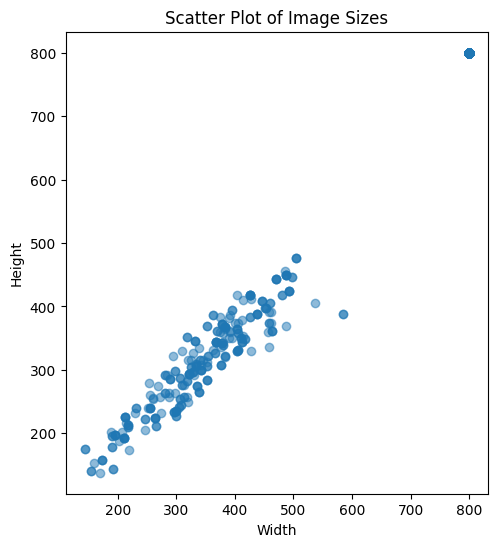

In [47]:
from pathlib import Path
img_sizes = [Image.open(str(img)).size for ext in ('*.jpg','*.png') for img in Path(dataset_dir).rglob(ext)]
heights, widths = zip(*img_sizes)

print("Minimum height and width:")
print(f" Height: {min(heights)} Width: {min(widths)}")

# Plotting the distribution of image sizes
plt.figure(figsize=(12, 6))
# Scatter plot of image widths and heights
plt.subplot(1, 2, 1)
plt.scatter(heights, widths, alpha=0.5)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Sizes')


From the images, I notice that they do not all have the same resolution and image ration. We therefore need to resize the images to the same resolution. I decided to go for 200x200 pixels for beginning.  

# Conclusion

Before training the model, we will need to consider the following points for the data preprocessing:

- Data augmentation (flipping, random noise, rotation, ...)
- Image rescaling (Rescale all images to 200x200 pixels)
- Split the data into training, validation and test data. Train and test data is already split by the folder structure. However, we need to split the train folder into training and validation. 